## Problem Statement:

>#### Build a logistic regression model to identify most potential leads by assigning a lead score between 0 and 100 to each leads in order to increase the lead conversion rate and achieve the target of lead conversion rate to be around 80% 

----
**Table of Content**
1. Importing Data
2. Data Understanding, and Cleaning (EDA)
   - Missing Value Inspection and Imputation
   - Exploratory Data Analysis
       - Categorical Variable
       - Numerical Variable
           - Outlier Check and Treatment
3. Build a logistic regression model
   - Data Preparation for model building
       - Convert a categorical variable into dummy variables
       - 3.1.2 Feature Scaling
       - Feature Selection using Recursive Feature Elimination (RFE) 
   - Model Building
       - Assessing a model using Statsmodel library
       - Check VIF
4. Model Evaluation
   - Confusion matrix (Assessing if predicted values matched with actual values by checking model parameters)
   - Plotting ROC curve
   - Finding Optimal Probability cut-off using ROC curve
   - Model Re-evaluation
   - Making Prediction on test set
   - Final Model Equation
5. Inference and Conclusion 

## Importing the required libraries

In [1]:
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# ML Model building and evaluation libraries
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn.metrics as metrics

# Warning suppression
import warnings
warnings.filterwarnings("ignore")

# customization for data display in the notebook
pd.set_option("display.max_rows",100)
pd.set_option("display.max_columns",100)

## 1. Import Data

In [2]:
lead_df=pd.read_csv(r"C:\Users\pooja\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.8\Machine Learning Upgrad data\Assignment\Leads.csv")
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


>**Observation: <br>**
> 1. **Prospect ID, Lead Number** are the **unique numbers** assigned to each customer and lead. Hence we can **drop** these variables before building model 
> 2. Many variables has **"Select"** value populated which **indicates NO INPUT by customer**. Hence better to **replace it with NULL.** <br><br>
> Above stated operations will be handled during data cleaning process

## 2. Data Understanding, and Cleaning

In [3]:
lead_df.shape

(9240, 37)

In [4]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000



>**Observation: <br>**
> 1. **TotalVisits, Total Time Spent on Website** and **Page Views Per Visit** has mean and 50% varying a little and max value is quite high compared to 50% (i.e. median). Hence it looks like it **may have outliers.**  <br><br>
> Above stated will be verified and handled (if required) during EDA.

### 2.1. Missing Value Inspection and Imputation


In [6]:
# checking missing record count in the dataframe
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
# Calculate the null percentage of each variable
null_percentage = (lead_df.isnull().mean() * 100).round(2)
null_percentage

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [8]:
# Get the variables with more than 50% missing percentage of values
columns_with_high_missing = null_percentage[null_percentage > 50].sort_values(ascending=False)
columns_with_high_missing

Lead Quality    51.59
dtype: float64


>**Observation: <br>**
> The only column with a null percentage greater than 50% is **Lead Quality**, which has 51.59% null value percentage.


#### 2.1.1 Lead Quality variable

In [9]:
# Inspecting "Lead Quality" variable
lead_df['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [10]:
# Due to data loss, we should impute the null values in Lead Quality with 'Unknown' rather than removing them.
lead_df['Lead Quality']=lead_df['Lead Quality'].fillna("Unknown")

In [11]:
# Verifying missing value again in "Lead Quality" variable
lead_df['Lead Quality'].isnull().sum()

0

#### 2.1.2 Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score variables

In [12]:
# Asymmetrique Activity Index 
# Asymmetrique Profile Index
# Asymmetrique Activity Score
# Asymmetrique Profile Score

# These columns above represent an index and score assigned to customers based on their activity and profile.
# We will retain only one of these columns and remove the others due to their high null values, which stand at 45.65%

lead_df=lead_df.drop(['Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1)

In [13]:
# Inspecting "Asymmetrique Activity Index" variable
lead_df['Asymmetrique Activity Index'].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [14]:
# Converting categorical values to integers and replacing null as 3 (considering it as lowest index value)
lead_df['Asymmetrique Activity Index']=lead_df['Asymmetrique Activity Index'].apply(lambda
            x:1 if x=='01.High' else 2 if x=='02.Medium' else 3)

In [15]:
lead_df['Asymmetrique Activity Index'].value_counts()

3    4580
2    3839
1     821
Name: Asymmetrique Activity Index, dtype: int64

In [16]:
# Verifying missing value again in "Asymmetrique Activity Index" variable
lead_df['Asymmetrique Activity Index'].isnull().sum()

0

In [17]:
# Convert 'Select' to null because it indicates that people did not choose any option
lead_df=lead_df.replace("Select",np.nan)

In [18]:
# Calculate the null record percentage of each variable
def cal_null_percentage():
    null_percentage = pd.DataFrame(round((lead_df.isnull().sum())*100/lead_df.shape[0],2)).reset_index()
    null_percentage.columns = ['Column Name', 'Null Values Percentage']
    return null_percentage.sort_values("Null Values Percentage", ascending = False)
    
cal_null_percentage()

,Column Name,Null Values Percentage
13,How did you hear about X Education,78.46
28,Lead Profile,74.19
29,City,39.71
12,Specialization,36.58
24,Tags,36.29
15,What matters most to you in choosing a course,29.32
14,What is your current occupation,29.11
11,Country,26.63
7,TotalVisits,1.48
9,Page Views Per Visit,1.48


>**Observation: <br>**
> 1. **How did you hear about X Education, Lead Profile** has very high missing value percentage which stands at 78%, 74% respectively  <br><br>
> Hence, Dropping these variables

In [19]:
# Inspecting "How did you hear about X Education" variable
lead_df["How did you hear about X Education"].value_counts()

Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64

In [20]:
# Dropping "How did you hear about X Education" variable
lead_df.drop(["How did you hear about X Education"],axis=1,inplace=True)


In [21]:
# Inspecting "Lead Profile" variable
lead_df["Lead Profile"].value_counts()

Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [22]:
# Dropping "Lead Profile" variable
lead_df.drop(["Lead Profile"],axis=1,inplace=True)

In [23]:
# Calculate the null record percentage of each variable
null_percentage = pd.DataFrame(round((lead_df.isnull().sum())*100/lead_df.shape[0],2)).reset_index()
null_percentage.columns = ['Column Name', 'Null Values Percentage']
null_percentage
null_percentage.sort_values("Null Values Percentage", ascending = False)


,Column Name,Null Values Percentage
27,City,39.71
12,Specialization,36.58
23,Tags,36.29
14,What matters most to you in choosing a course,29.32
13,What is your current occupation,29.11
11,Country,26.63
7,TotalVisits,1.48
9,Page Views Per Visit,1.48
10,Last Activity,1.11
3,Lead Source,0.39


>**Observation: <br>**
> 1. Many variables has missing value percentage ranging between 25% to 40%  <br><br>
> Impute the missing values for these variables

#### 2.1.3 Variables with more than 15% missing values


In [24]:
# Get the variables with more than 15% missing values
null_percentage = (lead_df.isnull().mean() * 100).round(2)
columns_with_missing = null_percentage[null_percentage >= 15].sort_values(ascending=False)
columns_with_missing

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
dtype: float64

In [25]:
# Get the list of variables with more than 15% missing values
columns_with_missing=columns_with_missing.index.tolist()
columns_with_missing

['City',
 'Specialization',
 'Tags',
 'What matters most to you in choosing a course',
 'What is your current occupation',
 'Country']

In [26]:
# Impute missing value with Unknown for above variables
for i in columns_with_missing:
    lead_df[i]=lead_df[i].fillna('Unknown')

In [27]:
# Calculate the null record percentage of each variable
cal_null_percentage()

,Column Name,Null Values Percentage
9,Page Views Per Visit,1.48
7,TotalVisits,1.48
10,Last Activity,1.11
3,Lead Source,0.39
20,Digital Advertisement,0.00
21,Through Recommendations,0.00
22,Receive More Updates About Our Courses,0.00
23,Tags,0.00
24,Lead Quality,0.00
25,Update me on Supply Chain Content,0.00


>**Observation: <br>**
> 1. **Page Views Per Visit, TotalVisits, Last Activity, Lead Source** has very low missing value percentage which stands below 2%  <br><br>
> Hence, Dropping the null values from these variables

#### 2.1.4 Variables with less than 15% missing values

In [28]:
# Remove the rows if the null percentage less than 15%
lead_df=lead_df.dropna()

In [29]:
# Verifying the missing values again
lead_df.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                      

>**Comments: <br>
There are no missing values present now**

#### 2.1.5 "Prospect ID", "Lead Number" variable dropping


In [30]:
# Removing "Prospect ID", "Lead Number" since they contain unique values for each customer and not useful for model building
lead_df.drop(["Prospect ID", "Lead Number"],axis=1,inplace=True)


In [31]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

## 2.2 Exploratory Data Analysis

### 2.2.1 Categorical Variables

In [32]:
# Get a list of object columns 
object_cols = lead_df.select_dtypes(include=['object']).columns
object_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### 2.2.1.1 Lead Origin Variable

In [33]:
# Checking distinct values 
lead_df["Lead Origin"].value_counts(normalize=True)*100

Landing Page Submission    53.835133
API                        39.431342
Lead Add Form               6.402909
Lead Import                 0.330615
Name: Lead Origin, dtype: float64

Text(0.5, 1.0, 'Percent Conversion by Lead Origin')

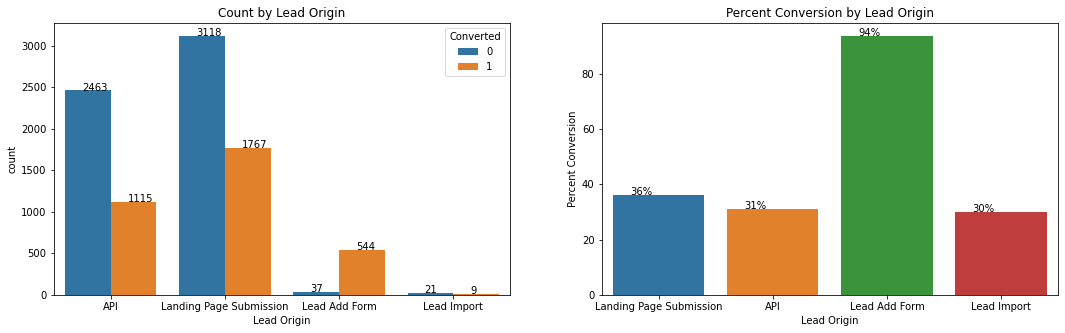

In [34]:
fig, ax1 = plt.subplots(figsize=(18,5))
plt.subplot(1, 2, 1)
ax=sns.countplot(x='Lead Origin',data=lead_df,hue='Converted')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.01))
plt.title ('Count by Lead Origin')
plt.subplot(1,2,2)
bar_df=pd.DataFrame((lead_df[lead_df["Converted"]==1]["Lead Origin"].value_counts()/lead_df["Lead Origin"].value_counts())*100)
bar_df.reset_index(inplace = True)
bar_df.columns = ["Lead Origin", "Percent Conversion"]
ax=sns.barplot( x='Lead Origin', y='Percent Conversion',data=bar_df)
for p in ax.patches:
   ax.annotate('{:.0f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.01))
plt.title ('Percent Conversion by Lead Origin')


>**Insight: <br>**
> 1. Most leads are generated from Landing Page Submission which counts at ~54% of total leads and its conversion rate is 36% which is quite low. <br>
> 2. Next highest leads are generated from API which counts at ~39% of total leads and its conversion rate is 31% which is quite low. <br>
> 3. Highest lead conversion is from Lead Add Form which is 94% though lead generated from it is comparatively less i.e. 6%
> 4. Lead capture and conversion rate from Lead Import is comparatively very low. So, right now, it is fine if we do not focus on this.

>**Recommendation: <br>**
> In order to improve overall conversion rate, we need to focus on below
> 1. Improve lead conversion for leads generated from Landing Page Submission and UPI
> 2. Try to capture more leads from Lead Add form where conversion rate is already high

#### 2.2.1.2 Lead Source Variable

In [35]:
# Checking distinct values 
lead_df["Lead Source"].value_counts(normalize=True)*100

Google               31.606789
Direct Traffic       28.025127
Olark Chat           19.318933
Organic Search       12.717655
Reference             4.882081
Welingak Website      1.421644
Referral Sites        1.377562
Facebook              0.341635
bing                  0.066123
google                0.055102
Click2call            0.044082
Live Chat             0.022041
Press_Release         0.022041
Social Media          0.022041
WeLearn               0.011020
blog                  0.011020
Pay per Click Ads     0.011020
testone               0.011020
welearnblog_Home      0.011020
NC_EDM                0.011020
youtubechannel        0.011020
Name: Lead Source, dtype: float64

>**Observation: <br>**
> google and Google represent same value. <br>
<br>
> Standardizing Google value in the variable

In [36]:
# Standardizing "google" value to "Google"
lead_df.loc[lead_df["Lead Source"]=="google","Lead Source"]="Google"

In [37]:
# Verifying distinct values 
lead_df["Lead Source"].value_counts(normalize=True)*100

Google               31.661891
Direct Traffic       28.025127
Olark Chat           19.318933
Organic Search       12.717655
Reference             4.882081
Welingak Website      1.421644
Referral Sites        1.377562
Facebook              0.341635
bing                  0.066123
Click2call            0.044082
Live Chat             0.022041
Press_Release         0.022041
Social Media          0.022041
WeLearn               0.011020
blog                  0.011020
Pay per Click Ads     0.011020
testone               0.011020
welearnblog_Home      0.011020
NC_EDM                0.011020
youtubechannel        0.011020
Name: Lead Source, dtype: float64

Text(0.5, 1.0, 'Percent Conversion by Lead Source')

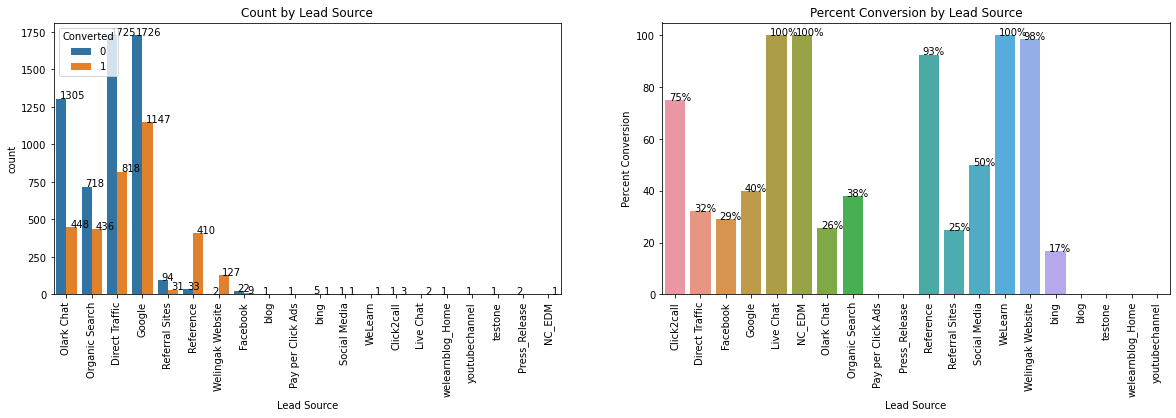

In [38]:
# Visualizing the distribution by conversion rate
fig, ax1 = plt.subplots(figsize=(20,5))
plt.subplot(1, 2, 1)
ax=sns.countplot(x='Lead Source',data=lead_df,hue='Converted')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.01))
plt.title ('Count by Lead Source')
ax.tick_params(axis='x', rotation=90)
plt.subplot(1,2,2)
bar_df=pd.DataFrame((lead_df[lead_df["Converted"]==1]["Lead Source"].value_counts()/lead_df["Lead Source"].value_counts())*100)
bar_df.reset_index(inplace = True)
bar_df.columns = ["Lead Source", "Percent Conversion"]
ax=sns.barplot( x='Lead Source', y='Percent Conversion',data=bar_df)
for p in ax.patches:
   ax.annotate('{:.0f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.01))
ax.tick_params(axis='x', rotation=90)
plt.title ('Percent Conversion by Lead Source')


>**Comment: <br>**
> Leads obtained from various sources like blog, Pay per Click Ads etc are very less and not contributing much to the model <br>
<br>
> Grouping them all into "Other" value

In [39]:
lead_df['Lead Source'] = lead_df['Lead Source'].replace(["bing","Click2call","Press_Release","Social Media","Live Chat","blog",
                                                         "welearnblog_Home","NC_EDM","Pay per Click Ads","testone","WeLearn",
                                                         "youtubechannel"], 'Other Sources')

In [40]:
# Verifying distinct values 
lead_df["Lead Source"].value_counts(normalize=True)*100

Google              31.661891
Direct Traffic      28.025127
Olark Chat          19.318933
Organic Search      12.717655
Reference            4.882081
Welingak Website     1.421644
Referral Sites       1.377562
Facebook             0.341635
Other Sources        0.253471
Name: Lead Source, dtype: float64

Text(0.5, 1.0, 'Percent Conversion by Lead Source')

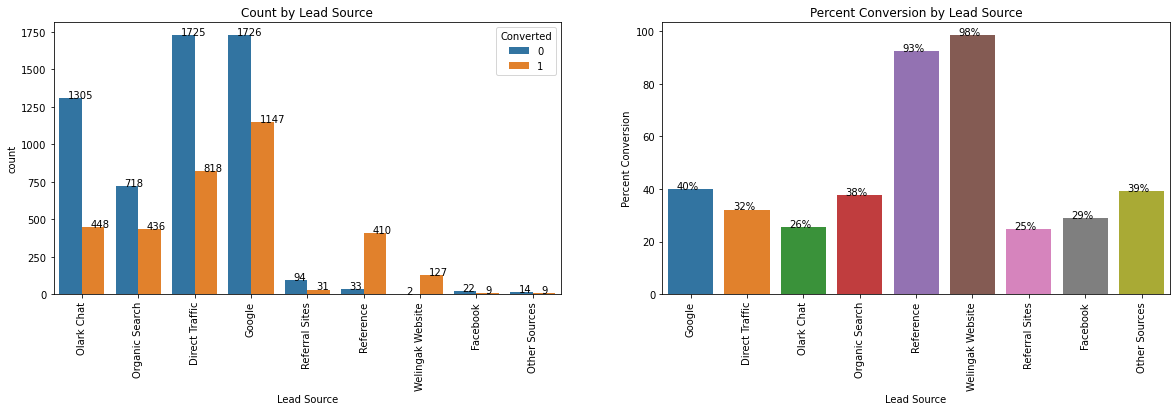

In [41]:
# Visualizing the distribution by conversion rate
fig, ax1 = plt.subplots(figsize=(20,5))
plt.subplot(1, 2, 1)
ax=sns.countplot(x='Lead Source',data=lead_df,hue='Converted')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.01))
plt.title ('Count by Lead Source')
ax.tick_params(axis='x', rotation=90)
plt.subplot(1,2,2)
bar_df=pd.DataFrame((lead_df[lead_df["Converted"]==1]["Lead Source"].value_counts()/lead_df["Lead Source"].value_counts())*100)
bar_df.reset_index(inplace = True)
bar_df.columns = ["Lead Source", "Percent Conversion"]
ax=sns.barplot( x='Lead Source', y='Percent Conversion',data=bar_df)
for p in ax.patches:
   ax.annotate('{:.0f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.01))
ax.tick_params(axis='x', rotation=90)
plt.title ('Percent Conversion by Lead Source')


>**Insight: <br>**
> 1. Most leads are generated from google which counts at ~32% of total leads and its conversion rate is 40% which is quite low. <br>
> 2. Next most leads are generated from Direct Traffic which counts at ~28% of total leads and its conversion rate is 32% which is quite low. <br>
> 3. The lead generation from sources like "Olark Chat", "Organic Search","Referral Sites" are moderate and also conversion is in general range of 25% to 40% 
> 4. Converstion rate is maximum for Welingak Website which is 98% though the lead generated from this source is less i.e.~2%.
> 5. Next highest Converstion rate is for Reference source which is 93% and the lead generated from this source is ~5%.

>**Recommendation: <br>**
> In order to improve overall conversion rate, we need to focus on below
> 1. Get more leads from Reference by convinsing existing customers to refer 
> 2. focus on Welingak Website to capture more traffic from there

In [42]:
# Get a list of object columns 
object_cols = lead_df.select_dtypes(include=['object']).columns
object_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### 2.2.1.3 Do Not Email Variable

In [43]:
# Checking distinct values 
lead_df["Do Not Email"].value_counts(normalize=True)

No     0.921093
Yes    0.078907
Name: Do Not Email, dtype: float64

Text(0.5, 1.0, 'Percent Conversion by Do Not Email')

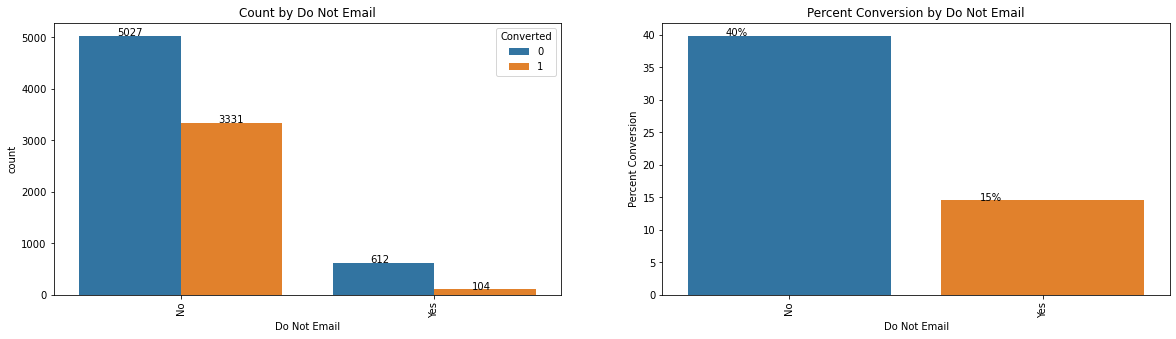

In [44]:
# Visualizing the distribution by conversion rate
fig, ax1 = plt.subplots(figsize=(20,5))
plt.subplot(1, 2, 1)
ax=sns.countplot(x='Do Not Email',data=lead_df,hue='Converted')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.01))
plt.title ('Count by Do Not Email')
ax.tick_params(axis='x', rotation=90)
plt.subplot(1,2,2)
bar_df=pd.DataFrame((lead_df[lead_df["Converted"]==1]["Do Not Email"].value_counts()/lead_df["Do Not Email"].value_counts())*100)
bar_df.reset_index(inplace = True)
bar_df.columns = ["Do Not Email", "Percent Conversion"]
ax=sns.barplot( x='Do Not Email', y='Percent Conversion',data=bar_df)
for p in ax.patches:
   ax.annotate('{:.0f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.01))
ax.tick_params(axis='x', rotation=90)
plt.title ('Percent Conversion by Do Not Email')


>**Insight: <br>**
> 1. Most of the customers has opted for sending email which stands at ~92% and conversion rate for these customer is higher which is 40%   <br>
> 2. Those who has opted to not to send email has lower conversion rate i.e. 15%.


>**Recommendation: <br>**
> In order to improve overall conversion rate, we can focus on customers who has opted to send email

#### 2.2.1.4 Do Not Call Variable

In [45]:
# Checking distinct values and its percentage
lead_df["Do Not Call"].value_counts(normalize=True)

No     0.99978
Yes    0.00022
Name: Do Not Call, dtype: float64

In [46]:
# Checking distinct values 
lead_df["Do Not Call"].value_counts()

No     9072
Yes       2
Name: Do Not Call, dtype: int64

>**Comment: <br>**
> The data is skewed here with 99.98% values opted as No. This will not be contributing much in the ML model.<br> <br>
> Dropping "Do Not Call" variable from the dataframe


In [47]:
lead_df.drop(["Do Not Call"],axis=1, inplace=True)

In [48]:
# Get a list of object columns 
object_cols = lead_df.select_dtypes(include=['object']).columns
object_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### 2.2.1.5 Last Activity Variable

In [49]:
# Checking distinct values and its percentage
lead_df["Last Activity"].value_counts(normalize=True)

Email Opened                    0.378223
SMS Sent                        0.299317
Olark Chat Conversation         0.107119
Page Visited on Website         0.070531
Converted to Lead               0.047168
Email Bounced                   0.034384
Email Link Clicked              0.029425
Form Submitted on Website       0.012784
Unreachable                     0.009918
Unsubscribed                    0.006502
Had a Phone Conversation        0.002755
View in browser link Clicked    0.000661
Approached upfront              0.000551
Email Received                  0.000220
Email Marked Spam               0.000220
Visited Booth in Tradeshow      0.000110
Resubscribed to emails          0.000110
Name: Last Activity, dtype: float64

Text(0.5, 1.0, 'Percent Conversion by Last Activity')

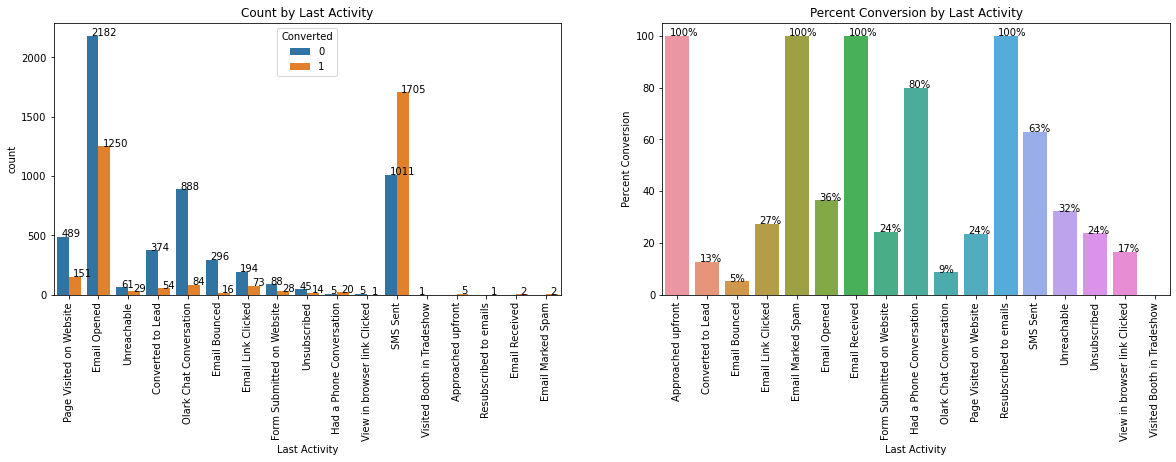

In [50]:
# Visualizing the distribution by conversion rate
fig, ax1 = plt.subplots(figsize=(20,5))
plt.subplot(1, 2, 1)
ax=sns.countplot(x='Last Activity',data=lead_df,hue='Converted')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.01))
plt.title ('Count by Last Activity')
ax.tick_params(axis='x', rotation=90)
plt.subplot(1,2,2)
bar_df=pd.DataFrame((lead_df[lead_df["Converted"]==1]["Last Activity"].value_counts()/lead_df["Last Activity"].value_counts())*100)
bar_df.reset_index(inplace = True)
bar_df.columns = ["Last Activity", "Percent Conversion"]
ax=sns.barplot( x='Last Activity', y='Percent Conversion',data=bar_df)
for p in ax.patches:
   ax.annotate('{:.0f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.01))
ax.tick_params(axis='x', rotation=90)
plt.title ('Percent Conversion by Last Activity')


>**Comment: <br>**
> Last Activity like "View in browser link Clicked","Approached upfront","Email Received","Email Marked Spam","Resubscribed to emails","Visited Booth in Tradeshow" etc has very few lead generation and not contributing much to the model <br>
<br>
> Grouping them all into "Other" value

In [51]:
lead_df['Last Activity'] = lead_df['Last Activity'].replace(["View in browser link Clicked","Approached upfront","Email Received","Email Marked Spam","Resubscribed to emails","Visited Booth in Tradeshow"], "Other Activity")

In [52]:
# Checking distinct values and its percentage
lead_df["Last Activity"].value_counts(normalize=True)

Email Opened                 0.378223
SMS Sent                     0.299317
Olark Chat Conversation      0.107119
Page Visited on Website      0.070531
Converted to Lead            0.047168
Email Bounced                0.034384
Email Link Clicked           0.029425
Form Submitted on Website    0.012784
Unreachable                  0.009918
Unsubscribed                 0.006502
Had a Phone Conversation     0.002755
Other Activity               0.001873
Name: Last Activity, dtype: float64

Text(0.5, 1.0, 'Percent Conversion by Last Activity')

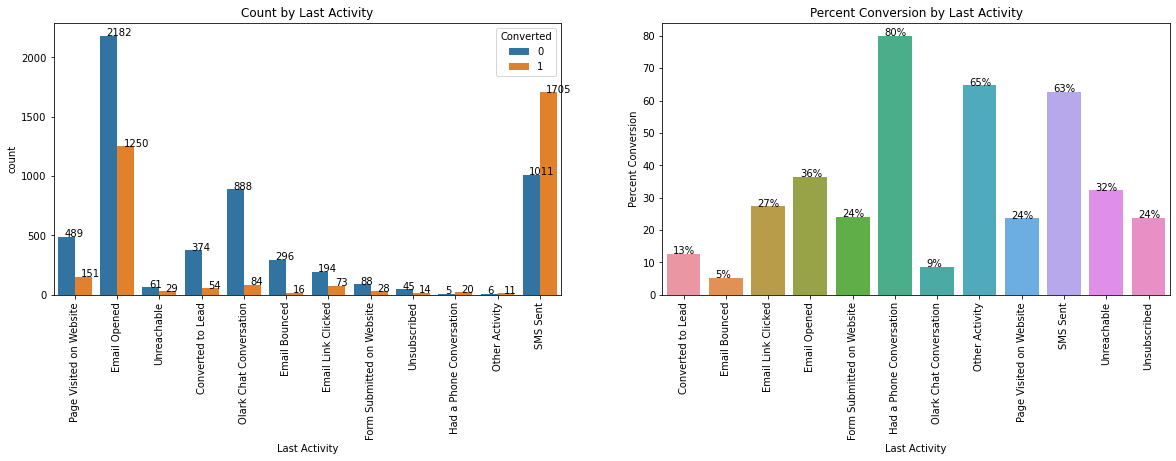

In [53]:
# Visualizing the distribution by conversion rate
fig, ax1 = plt.subplots(figsize=(20,5))
plt.subplot(1, 2, 1)
ax=sns.countplot(x='Last Activity',data=lead_df,hue='Converted')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.01))
plt.title ('Count by Last Activity')
ax.tick_params(axis='x', rotation=90)
plt.subplot(1,2,2)
bar_df=pd.DataFrame((lead_df[lead_df["Converted"]==1]["Last Activity"].value_counts()/lead_df["Last Activity"].value_counts())*100)
bar_df.reset_index(inplace = True)
bar_df.columns = ["Last Activity", "Percent Conversion"]
ax=sns.barplot( x='Last Activity', y='Percent Conversion',data=bar_df)
for p in ax.patches:
   ax.annotate('{:.0f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.01))
ax.tick_params(axis='x', rotation=90)
plt.title ('Percent Conversion by Last Activity')


>**Insight: <br>**
> 1. Major lead generation has occured from Last Activity as "Email Opened" at ~38% and its conversion rate is 36% which is less <br>
> 2. Next higher lead generation has happened from "SMS Sent" activity at ~30% and has a good conversion rate of 63%
> 3. Highest conversion rate is for "Has a Phone Conversation" i.e. 80% but the lead generated having Phone Conversation as last activity as less 0.2%


#### 2.2.1.6 Country Variable

In [54]:
# Checking distinct values and its percentage
lead_df["Country"].value_counts(normalize=True)

India                   0.715341
Unknown                 0.253031
United States           0.007604
United Arab Emirates    0.005841
Singapore               0.002645
Saudi Arabia            0.002314
United Kingdom          0.001653
Australia               0.001433
Qatar                   0.001102
Hong Kong               0.000771
Bahrain                 0.000771
Oman                    0.000661
France                  0.000661
unknown                 0.000551
Nigeria                 0.000441
Canada                  0.000441
Germany                 0.000441
South Africa            0.000441
Kuwait                  0.000441
Sweden                  0.000331
Ghana                   0.000220
Philippines             0.000220
Asia/Pacific Region     0.000220
Uganda                  0.000220
Bangladesh              0.000220
China                   0.000220
Belgium                 0.000220
Italy                   0.000220
Netherlands             0.000220
Switzerland             0.000110
Russia    

In [55]:
# Checking distinct values 
lead_df["Country"].value_counts()

India                   6491
Unknown                 2296
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Nigeria                    4
Canada                     4
Germany                    4
South Africa               4
Kuwait                     4
Sweden                     3
Ghana                      2
Philippines                2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
China                      2
Belgium                    2
Italy                      2
Netherlands                2
Switzerland                1
Russia                     1
Vietnam                    1
Denmark                    1
Malaysia                   1
Sri Lanka     

In [56]:
#Standardizing value unknown to Unknown
lead_df['Country'] = lead_df['Country'].replace(["unknown"], "Unknown")

In [57]:
# Checking distinct values 
lead_df["Country"].value_counts()

India                   6491
Unknown                 2301
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
Canada                     4
Nigeria                    4
Germany                    4
Kuwait                     4
South Africa               4
Sweden                     3
Ghana                      2
Philippines                2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
China                      2
Belgium                    2
Italy                      2
Netherlands                2
Switzerland                1
Russia                     1
Vietnam                    1
Denmark                    1
Malaysia                   1
Sri Lanka                  1
Kenya         

>**Insight: <br>**
> 1. Majority of the leads are generated from India which stands at ~72% and next highest is unknown where country is not selected by customer. <br><br>
> It doesn't seem much significant for model building but will not drop it now. It may get ignored in RFE.

#### 2.2.1.7 City Variable

In [58]:
# Checking distinct values and its percentage
lead_df["City"].value_counts(normalize=True)

Unknown                        0.393983
Mumbai                         0.350121
Thane & Outskirts              0.082103
Other Cities                   0.074939
Other Cities of Maharashtra    0.049151
Other Metro Cities             0.041547
Tier II Cities                 0.008155
Name: City, dtype: float64

>**Insight: <br>**
> 1. Majority of the leads are generated from unknown city where it is not opted by customer followed by Mumbai at 35%.<br>
> 2. Other cities are having contribution as well <br><br>
> It doesn't seem much significant for model building but will not drop it now. It may get ignored in RFE.

#### 2.2.1.8 Specialization Variable

In [59]:
# Checking distinct values and its percentage
lead_df["Specialization"].value_counts(normalize=True)

Unknown                              0.361693
Finance Management                   0.105687
Human Resource Management            0.092242
Marketing Management                 0.090699
Operations Management                0.054992
Business Administration              0.043972
IT Projects Management               0.040335
Supply Chain Management              0.038131
Banking, Investment And Insurance    0.036919
Travel and Tourism                   0.022261
Media and Advertising                0.022261
International Business               0.019396
Healthcare Management                0.017192
E-COMMERCE                           0.012233
Hospitality Management               0.012233
Retail Management                    0.011020
Rural and Agribusiness               0.008045
E-Business                           0.006282
Services Excellence                  0.004408
Name: Specialization, dtype: float64

Text(0.5, 1.0, 'Percent Conversion by Specialization')

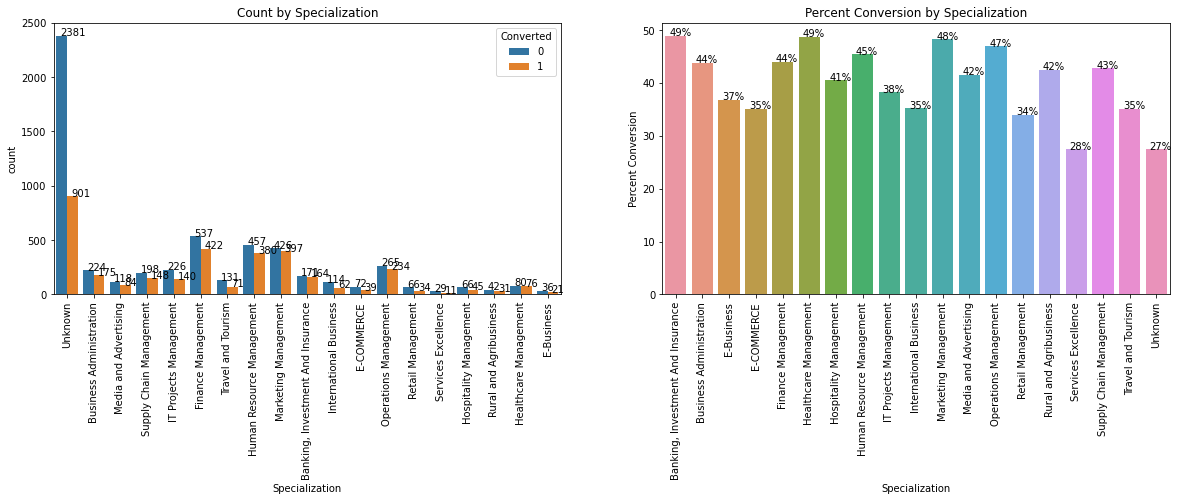

In [60]:
# Visualizing the distribution by conversion rate
fig, ax1 = plt.subplots(figsize=(20,5))
plt.subplot(1, 2, 1)
ax=sns.countplot(x='Specialization',data=lead_df,hue='Converted')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.01))
plt.title ('Count by Specialization')
ax.tick_params(axis='x', rotation=90)
plt.subplot(1,2,2)
bar_df=pd.DataFrame((lead_df[lead_df["Converted"]==1]["Specialization"].value_counts()/lead_df["Specialization"].value_counts())*100)
bar_df.reset_index(inplace = True)
bar_df.columns = ["Specialization", "Percent Conversion"]
ax=sns.barplot( x='Specialization', y='Percent Conversion',data=bar_df)
for p in ax.patches:
   ax.annotate('{:.0f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.01))
ax.tick_params(axis='x', rotation=90)
plt.title ('Percent Conversion by Specialization')


>**Insight: <br>**
> 1. Majority of the leads generated are not having any specialization specified and its conversion rate is 27%.<br>
> 2. Conversion rate for specialization like "Banking, Investment and Insurance","Healthcare Management", "Marketing Management", "Operations Management", "Human Resource Management", "Finance Management","Business Management" is well above 44%. <br>
> 3. Lead generation from "Finance Management","Human Resource Management","Marketing Management" among the specializations stated in point 2 contributing fine overall with lead generation percentage as ~11%, 9%, 9% respectively
          

#### 2.2.1.9 What is your current occupation

In [61]:
# Checking distinct values and its percentage
lead_df["What is your current occupation"].value_counts(normalize=True)

Unemployed              0.603482
Unknown                 0.295680
Working Professional    0.074609
Student                 0.022702
Other                   0.001653
Housewife               0.000992
Businessman             0.000882
Name: What is your current occupation, dtype: float64

Text(0.5, 1.0, 'Percent Conversion by Current Occupration')

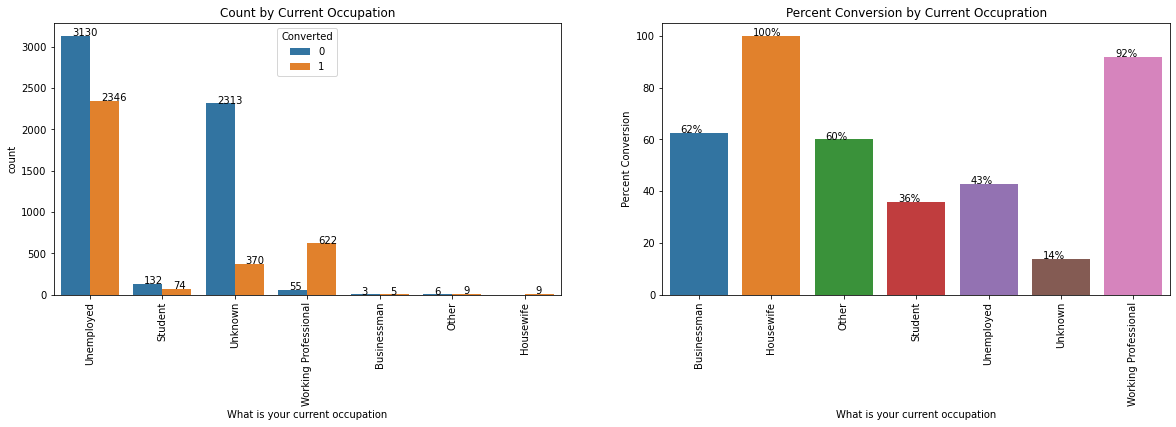

In [62]:
# Visualizing the distribution by conversion rate
fig, ax1 = plt.subplots(figsize=(20,5))
plt.subplot(1, 2, 1)
ax=sns.countplot(x="What is your current occupation",data=lead_df,hue='Converted')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.01))
plt.title ('Count by Current Occupation')
ax.tick_params(axis='x', rotation=90)
plt.subplot(1,2,2)
bar_df=pd.DataFrame((lead_df[lead_df["Converted"]==1]["What is your current occupation"].value_counts()/lead_df["What is your current occupation"].value_counts())*100)
bar_df.reset_index(inplace = True)
bar_df.columns = ["What is your current occupation", "Percent Conversion"]
ax=sns.barplot( x="What is your current occupation", y='Percent Conversion',data=bar_df)
for p in ax.patches:
   ax.annotate('{:.0f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.01))
ax.tick_params(axis='x', rotation=90)
plt.title ('Percent Conversion by Current Occupration')


>**Insight: <br>**
> 1. Most highest number of leads are generated by customers who are Unemployed however their rate of conversion is less 43%.<br>
> 2. Second highest number of leads are generated by customers whose occupation is now known and their conversion rate is far less as 14% <br>
> 3. Conversion rate for Working Professional is high i.e 92% though the lead generated by them is less comapred to Unemployed. 
Similar goes to Businessman and Others
> 4. Housewifes have 100% conversion rate but the lead generated from their side is very less

>**Recommendations: <br>**   
> In order to improve overall lead conversion rate, try to capture more leads from working professionals, Businessman, Housewife 

#### 2.2.1.10 What matters most to you in choosing a course, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque variables

In [63]:
# Checking distinct values 
lead_df["What matters most to you in choosing a course"].value_counts()
#lead_df["Search"].value_counts()
#lead_df["Magazine"].value_counts()

Better Career Prospects      6370
Unknown                      2702
Other                           1
Flexibility & Convenience       1
Name: What matters most to you in choosing a course, dtype: int64

>**Insight: <br>**
> 1. Majority of the leads are generated by one class of variables. <br><br>
> The data looks skewed with very less variance and it will not add any value in model. So it can be dropped 

In [64]:
lead_df.drop(["What matters most to you in choosing a course","Search","Magazine","Newspaper Article","X Education Forums"
             ,"Newspaper","Digital Advertisement", "Through Recommendations","Receive More Updates About Our Courses",
             "Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque"],axis=1,inplace=True)

#### 2.2.1.11 Tags

In [65]:
# Checking distinct values and its percentage
lead_df["Tags"].value_counts(normalize=True)


Unknown                                              0.366652
Will revert after reading the email                  0.222173
Ringing                                              0.130813
Interested in other courses                          0.056094
Already a student                                    0.051245
Closed by Horizzon                                   0.033172
switched off                                         0.026449
Busy                                                 0.020388
Lost to EINS                                         0.018955
Not doing further education                          0.015980
Interested  in full time MBA                         0.012784
Graduation in progress                               0.012233
invalid number                                       0.009147
Diploma holder (Not Eligible)                        0.006943
wrong number given                                   0.005180
opp hangup                                           0.003637
number n

>**Comment:<br>**
> The values in tag represent the tags/comments assigned to customer based on current status of the lead which is the activity taking place after customer has been contacted. For potential lead identification, this variable will not contribute because this variable is a result of next step of lead identification for contact.
<br><br>
> Dropping the Tags variable


In [66]:
lead_df.drop(["Tags"],axis=1,inplace=True)

#### 2.2.1.12 Lead Quality

In [67]:
# Checking distinct values and its percentage
lead_df["Lead Quality"].value_counts(normalize=True)


Unknown              0.520168
Might be             0.167401
Not Sure             0.119683
Worst                0.066233
High in Relevance    0.065241
Low in Relevance     0.061274
Name: Lead Quality, dtype: float64

>**Comment: <br>**
> Lead Quality is the result of the intuition of the employee and intuitions are not required for model building

> Thus, Dropping Lead Quality variable


In [68]:
lead_df.drop(["Lead Quality"],axis=1,inplace=True)

#### 2.2.1.13 A free copy of Mastering The Interview


In [69]:
# Checking distinct values and its percentage
lead_df["A free copy of Mastering The Interview"].value_counts(normalize=True)


No     0.681728
Yes    0.318272
Name: A free copy of Mastering The Interview, dtype: float64

Text(0.5, 1.0, 'Percent Conversion by Free Mastering Interview Copy')

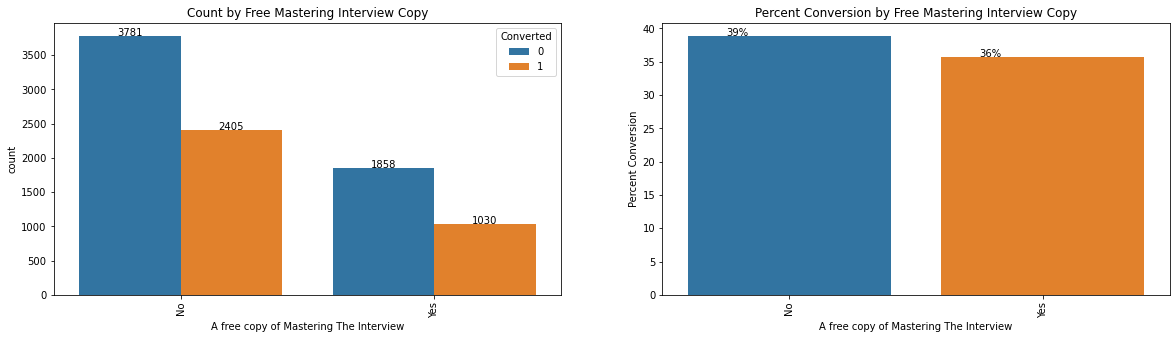

In [70]:
# Visualizing the distribution by conversion rate
fig, ax1 = plt.subplots(figsize=(20,5))
plt.subplot(1, 2, 1)
ax=sns.countplot(x="A free copy of Mastering The Interview",data=lead_df,hue='Converted')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.01))
plt.title ('Count by Free Mastering Interview Copy')
ax.tick_params(axis='x', rotation=90)
plt.subplot(1,2,2)
bar_df=pd.DataFrame((lead_df[lead_df["Converted"]==1]["A free copy of Mastering The Interview"].value_counts()/lead_df["A free copy of Mastering The Interview"].value_counts())*100)
bar_df.reset_index(inplace = True)
bar_df.columns = ["A free copy of Mastering The Interview", "Percent Conversion"]
ax=sns.barplot( x="A free copy of Mastering The Interview", y='Percent Conversion',data=bar_df)
for p in ax.patches:
   ax.annotate('{:.0f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.01))
ax.tick_params(axis='x', rotation=90)
plt.title ('Percent Conversion by Free Mastering Interview Copy')


>**Insight: <br>**
> 1. Majority leads are not opted to get Free copy of Mastering Interview with its contributions as 68% of overall leads<br>
> 2. Convertion rate of both classes of the variable is not varying large and has conversion rate as 39%, 36% for No, yes classes repectively <br><br>
> Thus, it seems the variable will not contribute much. We will verify this with RFE 


#### 2.2.1.14 Last Notable Activity


In [71]:
# Checking distinct values and its percentage
lead_df["Last Notable Activity"].value_counts(normalize=True)


Modified                        0.360040
Email Opened                    0.311109
SMS Sent                        0.237161
Page Visited on Website         0.035045
Olark Chat Conversation         0.020168
Email Link Clicked              0.019065
Email Bounced                   0.006612
Unsubscribed                    0.004959
Unreachable                     0.003527
Had a Phone Conversation        0.001543
Email Marked Spam               0.000220
Email Received                  0.000110
Form Submitted on Website       0.000110
Approached upfront              0.000110
View in browser link Clicked    0.000110
Resubscribed to emails          0.000110
Name: Last Notable Activity, dtype: float64

>**Comment: <br>**
> This variable represent the distribution and behaviour similar to Last Activity variable. <br><br>
Thus, dropping this variable

In [72]:
lead_df.drop(["Last Notable Activity"],axis=1,inplace=True)

### 2.2.2 Numerical Variables

In [73]:
# Get a list of numerical columns 
num_cols = lead_df.select_dtypes(exclude=['object']).columns
num_cols

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Asymmetrique Activity Index'],
      dtype='object')

###### Outlier Check and Treatment

In [74]:
# Checking for outliers in continuous variables
num_telcom=lead_df[['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Asymmetrique Activity Index']]
# Checking outliers at 25%, 50%, 75%,90%,95% and 99%
num_telcom.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Index
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151,2.407207
std,4.858802,545.256560,2.160871,0.649748
min,0.000000,0.000000,0.000000,1.000000
25%,1.000000,11.000000,1.000000,2.000000
50%,3.000000,246.000000,2.000000,2.000000
75%,5.000000,922.750000,3.200000,3.000000
90%,7.000000,1373.000000,5.000000,3.000000
95%,10.000000,1557.000000,6.000000,3.000000
99%,17.000000,1839.000000,9.000000,3.000000


>**Comment: <br>**
> This numerical variable 'TotalVisits', 'Total Time Spent on Website','Page Views Per Visit' seems to have outliers

#### 2.2.2.1 TotalVisits

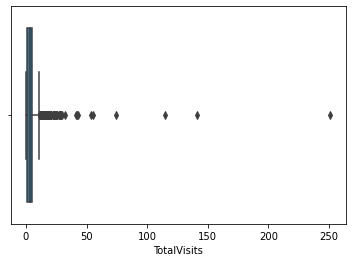

In [75]:
# Verifying outliers with boxplot
sns.boxplot(lead_df['TotalVisits'])
plt.show()

>**Comment: <br>**
> This variable 'TotalVisits' has higher values which is true for more visit leads however, it will affect ML model. <br><br>
> Capping the outliers to 95 percentile value 

In [76]:
# Getting 95th percentile of value
Q4 = lead_df['TotalVisits'].quantile(0.95) 
# Capping outliers to 95th percentile value 
lead_df.loc[lead_df['TotalVisits'] >= Q4, 'TotalVisits'] = Q4 


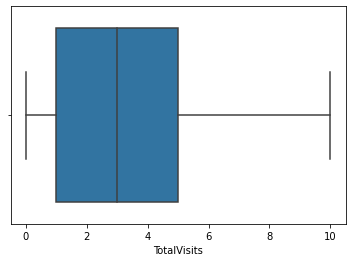

In [77]:
# Verifying outliers with boxplot
sns.boxplot(lead_df['TotalVisits'])
plt.show()

>**Comments:<br>**
Above looks better now

#### 2.2.2.2 Total Time Spent on Website

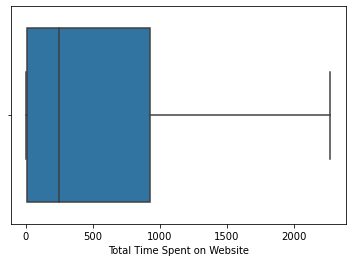

In [78]:
# Verifying outliers with boxplot
sns.boxplot(lead_df['Total Time Spent on Website'])
plt.show()

>**Comment: <br>**
Total Time Spent on Website does not have outliers

#### 2.2.2.3 Page Views Per Visit

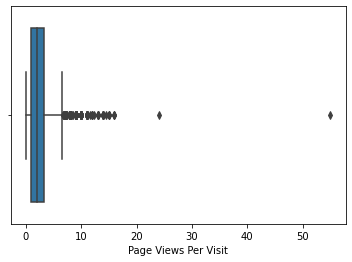

In [79]:
# Verifying outliers with boxplot
sns.boxplot(lead_df['Page Views Per Visit'])
plt.show()

>**Comment: <br>**
> This variable 'Page Views Per Visit' has higher values which is true for more Page views visit leads however, it will affect ML model. <br><br>
> Capping the outliers to 95 percentile value 

In [80]:
# Getting 95th percentile of value
Q4 = lead_df['Page Views Per Visit'].quantile(0.95) 
# Capping outliers to 95th percentile value 
lead_df.loc[lead_df['Page Views Per Visit'] >= Q4, 'Page Views Per Visit'] = Q4 


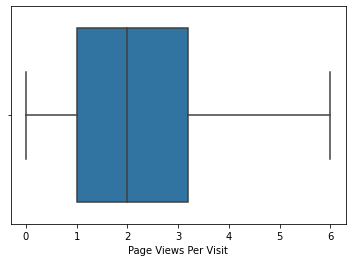

In [81]:
# Verifying outliers with boxplot
sns.boxplot(lead_df['Page Views Per Visit'])
plt.show()

>**Comment:<br>**
No Outliers present now

#### 2.2.2.4 Converted - Target variable

In [82]:
# Checking the distribution of values in Target variable
lead_df["Converted"].value_counts()

0    5639
1    3435
Name: Converted, dtype: int64

In [83]:
lead_df["Converted"].value_counts(normalize=True)

0    0.621446
1    0.378554
Name: Converted, dtype: float64

>**Comment:<br>**
The target variable classes are properly distributed. There is not data bias present

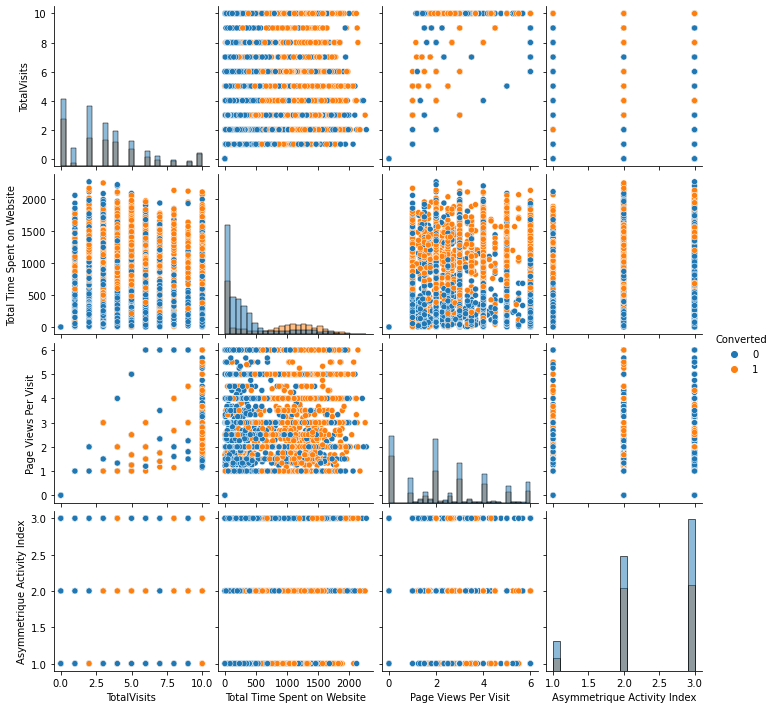

In [84]:
sns.pairplot(lead_df,hue="Converted", diag_kind="hist")
plt.show()

>**Insight:<br>**
More the time spent by customer on the website, more is the conversion rate

## 3. Build a Logistic Regression model

### 3.1 Data Preparation for Model Building

#### 3.1.1 Convert a categorical variable into dummy variables

In [85]:
# Get a list of object columns 
object_cols = lead_df.select_dtypes(include=['object']).columns
object_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation', 'City',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [86]:
# Creating dummy variable for all object columns
dummy=pd.get_dummies(lead_df[object_cols], dtype=int, drop_first=True)
dummy

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Unknown,Country_Vietnam,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,A free copy of Mastering The Interview_Yes
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9236,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1

In [87]:
# Merging dummy variables with original dataframe
lead_df_1=pd.concat([lead_df, dummy], axis=1)

# Dropping original object columns from dataframe since dummy variables are created for them and kepping them is repetative feature
lead_df_1.drop(columns=object_cols, axis=1, inplace=True)
lead_df_1.shape

(9074, 96)

In [88]:
# Separate features and target (independent and dependent variables)
y = lead_df_1.pop('Converted')
X = lead_df_1

In [89]:
# Verifying the features
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Index,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Unknown,Country_Vietnam,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,A free copy of Mastering The Interview_Yes
0,0.0,0,0.0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
1,5.0,674,2.5,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,2.0,1532,2.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,1.0,305,1.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2.0,1428,1.0,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [90]:
# Verifying target
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [91]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)


In [92]:
print("X train size ",X_train.shape)
print("y train size ",y_train.shape)
print("X test size ",X_test.shape)
print("y test size ",y_test.shape)

X train size  (6351, 95)
y train size  (6351,)
X test size  (2723, 95)
y test size  (2723,)


#### 3.1.2 Feature Scaling

In [93]:
# listing variables that requires scaling
var=['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Index']

# Initialize a standard scaler
scale=StandardScaler()

# Fit and transform the scaler on train data
X_train[var]=scale.fit_transform(X_train[var])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Index,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Unknown,Country_Vietnam,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,A free copy of Mastering The Interview_Yes
3009,-0.432779,-0.160255,-0.155018,0.908032,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1012,-0.432779,-0.540048,-0.155018,-0.642630,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
9226,-1.150329,-0.888650,-1.265540,-2.193292,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
4750,-0.432779,1.643304,-0.155018,0.908032,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
7987,0.643547,2.017593,0.122613,-0.642630,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


#### 3.1.3 Feature Selection using RFE 

In [94]:
# Initialize the model
lm = LogisticRegression(max_iter=1000)

# Initialize RFE
rfe = RFE(estimator=lm, n_features_to_select=15)

# Fit RFE
rfe.fit(X_train, y_train)


RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=15)

In [95]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('TotalVisits', False, 21),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 22),
 ('Asymmetrique Activity Index', False, 47),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 33),
 ('Lead Source_Facebook', False, 5),
 ('Lead Source_Google', False, 42),
 ('Lead Source_Olark Chat', False, 25),
 ('Lead Source_Organic Search', False, 59),
 ('Lead Source_Other Sources', False, 29),
 ('Lead Source_Reference', False, 18),
 ('Lead Source_Referral Sites', False, 46),
 ('Lead Source_Welingak Website', True, 1),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Email Bounced', False, 63),
 ('Last Activity_Email Link Clicked', False, 31),
 ('Last Activity_Email Opened', False, 7),
 ('Last Activity_Form Submitted on Website', False, 58),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other Activity', False, 2),
 ('Las

In [96]:
# Extract the names of the features that have been selected by the RFE
selected_features = X.columns[rfe.support_]
selected_features

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Country_Italy', 'Country_Unknown',
       'Specialization_Unknown', 'What is your current occupation_Housewife',
       'What is your current occupation_Unknown',
       'What is your current occupation_Working Professional'],
      dtype='object')

### 3.2 Model Building

#### 3.2.1 Assessing the model with Statsmodel library

###### Model 1

In [97]:
# Adding a constant to X_train set since statsmodel do not add constant by default
X_train_sm=sm.add_constant(X_train[selected_features])

#Initiating the Generalized Linear Model of Binomial family since target variable has 2 possible outcomes i.e. 1 or 0
logsm2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial() )

# Fit the model 
logmodel2=logsm2.fit()

# Model statistics check
logmodel2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2557.8
Date:                Tue, 23 Jul 2024   Deviance:                       5115.7
Time:                        23:43:39   Pearson chi2:                 6.29e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1245      0.121     -1.030      0.303      -0.361       0.112
Total Time Spent on Website                              1.1283      0.041     27.444      0.000       1.048       1.209
Lead Origin_Landing Page Submission                     -1.1228      0.125     -8.957      0.000      -1.369      -0.877
Lead Origin_Lead Add Form                                1.7636      0.235      7.507      0.000       1.303       2.224
Lead Source_Welingak Website                             2.5559      0.756      3.380      0.001       1.074       4.038
Do Not Email_Yes                                        -1.7859      0.187     -9.534      0.000      -2.153      -1.419
Last Activity_Had a Phone Conversation                   2.7183      0.760      3.579      0.000       1.230       4.207
Last Activity_Olark Chat Conversation                   -1.2989      0.167     -7.772      0.000      -1.626      -0.971
Last Activity_SMS Sent                                   1.3516      0.076     17.881      0.000       1.203       1.500
Last Activity_Unsubscribed                               1.5305      0.472      3.244      0.001       0.606       2.455
Country_Italy                                          -23.8402   2.52e+04     -0.001      0.999   -4.95e+04    4.95e+04
Country_Unknown                                          1.3374      0.123     10.832      0.000       1.095       1.579
Specialization_Unknown                                  -1.0917      0.127     -8.583      0.000      -1.341      -0.842
What is your current occupation_Housewife               22.7704   1.54e+04      0.001      0.999   -3.01e+04    3.02e+04
What is your current occupation_Unknown                 -1.1972      0.089    -13.449      0.000      -1.372      -1.023
What is your current occupation_Working Professional     2.3359      0.191     12.202      0.000       1.961       2.711
========================================================================================================================
"""

>**Observation:<br>**
> **1. p-value of Country_Italy is 0.999 which is >0.05. Hence the feature is insignificant. <br>
> **2. p-value of What is your current occupation_Housewife is 0.999 which is >0.05. Hence the feature is insignificant. <br><br>
> will drop Country_Italy since it is insignificant**

In [98]:
# creating function for determining VIF (Variance Inflation factor)
def calculate_vif():
    vif = pd.DataFrame()
    X = X_train[selected_features]
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

# Calculate VIF for the scaled features
vif_df = calculate_vif()

print(vif_df)

                                             Features   VIF
10                                    Country_Unknown  2.86
11                             Specialization_Unknown  2.28
2                           Lead Origin_Lead Add Form  1.96
1                 Lead Origin_Landing Page Submission  1.63
13            What is your current occupation_Unknown  1.60
7                              Last Activity_SMS Sent  1.56
6               Last Activity_Olark Chat Conversation  1.44
3                        Lead Source_Welingak Website  1.37
0                         Total Time Spent on Website  1.33
14  What is your current occupation_Working Profes...  1.19
4                                    Do Not Email_Yes  1.18
8                          Last Activity_Unsubscribed  1.08
12          What is your current occupation_Housewife  1.01
5              Last Activity_Had a Phone Conversation  1.00
9                                       Country_Italy  1.00


>**Observation:<br>**
> **1. VIF of all features is less than 5. Hence it indicates that no multicollinearity exists in the data**

###### Model 2

###### Dropping feature Country_Italy since it's p-value is greater than 0.05 and is insignificant

In [99]:
# Dropping Country_Unknown from the selected features
selected_features=selected_features.drop(["Country_Italy"],1)

In [100]:
# Adding a constant to X_train set since statsmodel do not add constant by default
X_train_sm=sm.add_constant(X_train[selected_features])

#Initiating the Generalized Linear Model of Binomial family since target variable has 2 possible outcomes i.e. 1 or 0
logsm2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial() )

# Fit the model 
logmodel2=logsm2.fit()

# Model statistics check
logmodel2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2560.6
Date:                Tue, 23 Jul 2024   Deviance:                       5121.2
Time:                        23:43:39   Pearson chi2:                 6.29e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1234      0.121     -1.022      0.307      -0.360       0.113
Total Time Spent on Website                              1.1255      0.041     27.415      0.000       1.045       1.206
Lead Origin_Landing Page Submission                     -1.1235      0.125     -8.967      0.000      -1.369      -0.878
Lead Origin_Lead Add Form                                1.7639      0.235      7.509      0.000       1.304       2.224
Lead Source_Welingak Website                             2.5556      0.756      3.379      0.001       1.073       4.038
Do Not Email_Yes                                        -1.7830      0.187     -9.523      0.000      -2.150      -1.416
Last Activity_Had a Phone Conversation                   2.7166      0.759      3.578      0.000       1.229       4.205
Last Activity_Olark Chat Conversation                   -1.2992      0.167     -7.776      0.000      -1.627      -0.972
Last Activity_SMS Sent                                   1.3475      0.076     17.841      0.000       1.199       1.495
Last Activity_Unsubscribed                               1.5280      0.472      3.240      0.001       0.604       2.452
Country_Unknown                                          1.3347      0.123     10.820      0.000       1.093       1.577
Specialization_Unknown                                  -1.0916      0.127     -8.586      0.000      -1.341      -0.842
What is your current occupation_Housewife               22.7689   1.54e+04      0.001      0.999   -3.01e+04    3.02e+04
What is your current occupation_Unknown                 -1.1959      0.089    -13.445      0.000      -1.370      -1.022
What is your current occupation_Working Professional     2.3366      0.191     12.210      0.000       1.962       2.712
========================================================================================================================
"""

>**Observation:<br>**
> **1. p-value of What is your current occupation_Housewife is 0.999 which is >0.05. Hence the feature is insignificant. <br><br>
> will drop What is your current occupation_Housewife since it is insignificant**

In [101]:
# Calculate VIF for the scaled features
vif_df = calculate_vif()

print(vif_df)

                                             Features   VIF
9                                     Country_Unknown  2.86
10                             Specialization_Unknown  2.28
2                           Lead Origin_Lead Add Form  1.96
1                 Lead Origin_Landing Page Submission  1.63
12            What is your current occupation_Unknown  1.60
7                              Last Activity_SMS Sent  1.55
6               Last Activity_Olark Chat Conversation  1.44
3                        Lead Source_Welingak Website  1.37
0                         Total Time Spent on Website  1.33
13  What is your current occupation_Working Profes...  1.19
4                                    Do Not Email_Yes  1.18
8                          Last Activity_Unsubscribed  1.08
11          What is your current occupation_Housewife  1.01
5              Last Activity_Had a Phone Conversation  1.00


>**Observation:<br>**
> **1. VIF of all features is less than 5. Hence it indicates that no multicollinearity exists in the data**

###### Model 3

###### Dropping feature What is your current occupation_Housewife since it's p-value is greater than 0.05 and is insignificant

In [102]:
# Dropping Country_Unknown from the selected features
selected_features=selected_features.drop(["What is your current occupation_Housewife"],1)

In [103]:
# Adding a constant to X_train set since statsmodel do not add constant by default
X_train_sm=sm.add_constant(X_train[selected_features])

#Initiating the Generalized Linear Model of Binomial family since target variable has 2 possible outcomes i.e. 1 or 0
logsm2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial() )

# Fit the model 
logmodel2=logsm2.fit()

# Model statistics check
logmodel2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2565.0
Date:                Tue, 23 Jul 2024   Deviance:                       5129.9
Time:                        23:43:40   Pearson chi2:                 6.31e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1147      0.121     -0.951      0.342      -0.351       0.122
Total Time Spent on Website                              1.1242      0.041     27.425      0.000       1.044       1.205
Lead Origin_Landing Page Submission                     -1.1249      0.125     -8.990      0.000      -1.370      -0.880
Lead Origin_Lead Add Form                                1.7884      0.234      7.626      0.000       1.329       2.248
Lead Source_Welingak Website                             2.5335      0.756      3.350      0.001       1.051       4.016
Do Not Email_Yes                                        -1.7862      0.187     -9.540      0.000      -2.153      -1.419
Last Activity_Had a Phone Conversation                   2.7102      0.759      3.570      0.000       1.222       4.198
Last Activity_Olark Chat Conversation                   -1.3010      0.167     -7.786      0.000      -1.628      -0.974
Last Activity_SMS Sent                                   1.3423      0.075     17.784      0.000       1.194       1.490
Last Activity_Unsubscribed                               1.5258      0.472      3.236      0.001       0.602       2.450
Country_Unknown                                          1.3298      0.123     10.797      0.000       1.088       1.571
Specialization_Unknown                                  -1.0962      0.127     -8.627      0.000      -1.345      -0.847
What is your current occupation_Unknown                 -1.1979      0.089    -13.474      0.000      -1.372      -1.024
What is your current occupation_Working Professional     2.3309      0.191     12.182      0.000       1.956       2.706
========================================================================================================================
"""

>**Observation:<br>**
> **1. p-value of all features is less than 0.05. Hence it indicates that all remaining features are significant**

In [104]:
# Calculate VIF for the scaled features
vif_df = calculate_vif()

print(vif_df)

                                             Features   VIF
9                                     Country_Unknown  2.86
10                             Specialization_Unknown  2.28
2                           Lead Origin_Lead Add Form  1.95
1                 Lead Origin_Landing Page Submission  1.63
11            What is your current occupation_Unknown  1.60
7                              Last Activity_SMS Sent  1.55
6               Last Activity_Olark Chat Conversation  1.44
3                        Lead Source_Welingak Website  1.37
0                         Total Time Spent on Website  1.33
12  What is your current occupation_Working Profes...  1.19
4                                    Do Not Email_Yes  1.18
8                          Last Activity_Unsubscribed  1.08
5              Last Activity_Had a Phone Conversation  1.00


>**Observation:<br>**
> **1. VIF of all features is less than 5. Hence it indicates that no multicollinearity exists in the data**

**COMMENT:
Since Model 3 has all features which are significant and no multicollinearity exists. Considering Model 3 as final model**

In [105]:
# Checking the parameters of model
logmodel2.params

const                                                  -0.114705
Total Time Spent on Website                             1.124213
Lead Origin_Landing Page Submission                    -1.124929
Lead Origin_Lead Add Form                               1.788364
Lead Source_Welingak Website                            2.533504
Do Not Email_Yes                                       -1.786151
Last Activity_Had a Phone Conversation                  2.710186
Last Activity_Olark Chat Conversation                  -1.300981
Last Activity_SMS Sent                                  1.342256
Last Activity_Unsubscribed                              1.525816
Country_Unknown                                         1.329777
Specialization_Unknown                                 -1.096213
What is your current occupation_Unknown                -1.197898
What is your current occupation_Working Professional    2.330905
dtype: float64

In [106]:
# Getting the predicted value on the trained dataset
y_train_pred = logmodel2.predict(X_train_sm)
y_train_pred[:10]

3009    0.068008
1012    0.083308
9226    0.613508
4750    0.679647
7987    0.914575
1281    0.756436
2880    0.031422
4971    0.966685
7536    0.863097
1248    0.899472
dtype: float64

In [107]:
# Reshaping the values
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0680084 , 0.08330839, 0.61350801, 0.6796466 , 0.91457549,
       0.75643577, 0.0314222 , 0.96668522, 0.86309709, 0.89947243])

In [108]:
# Creating a dataframe with the actual 'Converted' flag and the predicted 'Lead_Score_Prob' probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Lead_Score_Prob':y_train_pred})

# Adding a unique identifier from y train index values
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID
0,0,0.068008,3009
1,0,0.083308,1012
2,0,0.613508,9226
3,1,0.679647,4750
4,1,0.914575,7987


In [109]:
# Creating a new column 'Predicted' with value 1 if Lead_Score_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID,Predicted
0,0,0.068008,3009,0
1,0,0.083308,1012,0
2,0,0.613508,9226,1
3,1,0.679647,4750,1
4,1,0.914575,7987,1


### 4. Model Evaluation

###### 4.1 Assessing if predicted values matched with actual values by checking model parameters

In [110]:
# Confusion matrix
confusion=confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3458,  447],
       [ 715, 1731]], dtype=int64)

In [111]:
# check the overall accuracy.
print(accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8170366871358841


>**Model accuracy is 82%**

In [112]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [113]:
# Let us calculate sensitivity 
round((TP / float(TP+FN)),2)

0.71

>**71% of Converted are predicted accurately by the model**

In [114]:
# Let us calculate specificity
round((TN / float(TN+FP)),2)

0.89

>**89% of Non-Converted are predicted accurately by the model**

In [115]:
# Calculate flase positive rate 
round(FP/float(TN+FP),2)

0.11

>**11% of Non-Converted are predicted as Converted**

In [116]:
# Calculate False negative rate 
round(FN/float(TP+FN),2)

0.29

>**29% of Converted are predicted as Non-Converted**

In [117]:
# Positive prediction value 
round(TP/float(TP+FP),2)

0.79

>**79% of all predicted Converted are actually Converted, remainig 21% are actually Non-Converted**

In [118]:
# Negative predicted value 
round(TN/float(TN+FN),2)

0.83

>**83% of all predicted Not-Converted are actually not-Converted, remainig 17% are actually Converted**

**Comment:
Model 4 we built has -**
1. Accuracy ~81%
2. Specificity ~71%
3. Sensitivity ~89%

We are interested in identifying customers which can be Converted. So, predicting them correctly is important. 

**Thus, high sensitivity is required. (we do not want to misclassify customers which can be Converted as Non-Converted)**


Lets plot ROC curve to find optimal probability cut-off, to plot trade-off between TPR and FPR i.e. sensitivity and specificity.

### 4.2 Plotting ROC curve

In [119]:
# Checking ROC AUC value
fpr, tpr, _ = roc_curve(y_train_pred_final.Converted, y_train_pred_final.Lead_Score_Prob)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc:.2f}")

ROC AUC: 0.89


#### Observation:
    - A ROC AUC of 0.89 suggests that the model has high discriminative ability.

In [120]:
# Defining function for ROC curve plotting
def draw_roc_curve(actual, probs):
    fpr,tpr,thresholds=metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label='ROC curve (area=%0.2f)'%auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False positive rate or [1- true negative rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Reciever operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

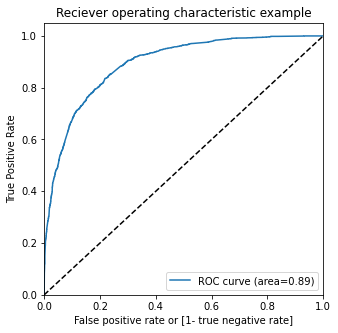

In [121]:
draw_roc_curve(y_train_pred_final.Converted,y_train_pred_final.Lead_Score_Prob)

- ROC curve having value close to 1 indicates a good predictive model. We are getting 0.89. Thus, the model built is a good model

### 4.3 Finding Optimal Probability cut-off using ROC curve
Optimal cut-off: where we balances sensitivity and specificity

In [122]:
# Create columns with different probability cut-offs
numbers=[float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]=y_train_pred_final.Lead_Score_Prob.map(lambda x:1 if x>i else 0)
y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.068008,3009,0,1,0,0,0,0,0,0,0,0,0
1,0,0.083308,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.613508,9226,1,1,1,1,1,1,1,1,0,0,0
3,1,0.679647,4750,1,1,1,1,1,1,1,1,0,0,0
4,1,0.914575,7987,1,1,1,1,1,1,1,1,1,1,1


In [123]:
# Calculate accuracy, sensitivity and specificity for each probability cut-offs
cutoff_df=pd.DataFrame(columns=["prob","acc","speci","sensi"])

num=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in (num):
    cm1=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy=(cm1[0,0]+cm1[1,1])/total1
    speci=cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi=cm1[1,1]/(cm1[1,1]+cm1[1,0])
    cutoff_df.loc[i]=[i,accuracy,speci,sensi]
print(cutoff_df)

     prob       acc     speci     sensi
0.0   0.0  0.385136  0.000000  1.000000
0.1   0.1  0.592190  0.344686  0.987326
0.2   0.2  0.766651  0.670679  0.919869
0.3   0.3  0.798142  0.765173  0.850777
0.4   0.4  0.812313  0.837388  0.772281
0.5   0.5  0.817037  0.885531  0.707686
0.6   0.6  0.806960  0.913700  0.636549
0.7   0.7  0.784758  0.945455  0.528209
0.8   0.8  0.763187  0.968246  0.435814
0.9   0.9  0.716265  0.986940  0.284137


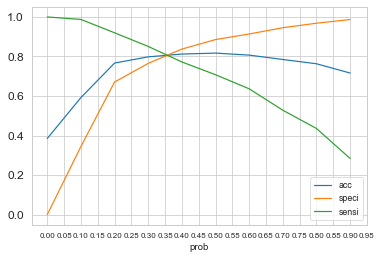

In [124]:
# Plot accuracy, sensitivity and specificity for different probability cut-offs
sns.set_style('whitegrid')
sns.set_context('paper')
cutoff_df.plot.line (x="prob",y=["acc","speci","sensi"])
plt.xticks(np.arange(0,1,step=.05), size=8)
plt.yticks(size=12)
plt.show()

From above ROC curve, we observe that
**Optimal Probability Cut-off = 0.35**

In [125]:
# Predicting training set again with Optimal Probability Cut-off
y_train_pred_final['final_predicted'] = y_train_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [126]:
# Confusion matrix
confusion=confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion

array([[3146,  759],
       [ 482, 1964]], dtype=int64)

In [127]:
# Accuracy Score
print(accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

0.8045977011494253


>**Model Accuracy is 80%**

In [128]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [129]:
# Let us calculate sensitivity 
round((TP / float(TP+FN)),2)

0.8

>**80% of Converted are predicted accurately by the model. Thus, we see improvement in sensitivity by using Optimal Porbability Cut-off**

In [130]:
# Let us calculate specificity
round((TN / float(TN+FP)),2)

0.81

>**81% of Non-Converted are predicted accurately by the model**

In [131]:
# Calculate flase positive rate 
round(FP/float(TN+FP),2)

0.19

>**19% of Non-Converted are predicted as Converted**

In [132]:
# Calculate False negative rate 
round(FN/float(TP+FN),2)

0.2

>**20% of Converted are predicted as Non-Converted (this has improved as compared to the default 0.5 probability cut-off which is good)**

In [133]:
# Positive prediction value 
round(TP/float(TP+FP),2)

0.72

>**72% of all predicted Converted are actually Converted, remainig 28% are actually Non-Converted**

In [134]:
# Negative predicted value 
round(TN/float(TN+FN),2)

0.87

>**87% of all predicted Non-Converted are actually Non-Converted, remainig 13% are actually Converted. This has also improved since the misclassification percentage of Converted leads are less now**

In [135]:
#Calculating Precision (i.e. Positive prediction value )
precision =round(TP/float(TP+FP),2)
precision

0.72

>**Precision is 72% indicates 72% of Predicted Converted are actually Converted**

In [136]:
#Calculating Recall
recall = round(TP/float(TP+FN),2)
recall

0.8

>**Recall is 80% indicates 80% of Actual Converted are predicted appropriately.**

- **Recall is an important metric as per the objective of this case study since business is interested in identifying hot leads. Hence we don't want to left out potential leads which can be Converted.** <br><br>
- **Recall percentage we got is 80% which indicates a good model**

###### Assigning Lead Score on Train Set

In [137]:
#Assigning lead score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Lead_Score_Prob.map(lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.068008,3009,0,1,0,0,0,0,0,0,0,0,0,0,7
1,0,0.083308,1012,0,1,0,0,0,0,0,0,0,0,0,0,8
2,0,0.613508,9226,1,1,1,1,1,1,1,1,0,0,0,1,61
3,1,0.679647,4750,1,1,1,1,1,1,1,1,0,0,0,1,68
4,1,0.914575,7987,1,1,1,1,1,1,1,1,1,1,1,1,91


### 4.4 Making Predictions on the test set

In [138]:
X_test

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Index,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Unknown,Country_Vietnam,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,A free copy of Mastering The Interview_Yes
3271,4.0,157,4.0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
1490,5.0,1513,5.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
7936,2.0,74,2.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
4216,0.0,0,0.0,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3830,8.0,164,6.0,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,3.0,829,1.5,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0

In [139]:
# Applying the scaling on test set
# list of variables that need to be scaled
var=['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Index']

# scale transform on test set
X_test[var]=scale.transform(X_test[var])

X_test.head()



,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Index,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Unknown,Country_Vietnam,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,A free copy of Mastering The Interview_Yes
3271,0.284772,-0.600595,0.955505,0.908032,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
1490,0.643547,1.887326,1.510766,-0.642630,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
7936,-0.432779,-0.752879,-0.155018,-2.193292,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
4216,-1.150329,-0.888650,-1.265540,-0.642630,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3830,1.719873,-0.587751,2.066027,0.908032,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1


In [140]:
# Keeping only selected features shortlisted in model building phase from the test set too
X_test=X_test[selected_features]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Activity_Unsubscribed,Country_Unknown,Specialization_Unknown,What is your current occupation_Unknown,What is your current occupation_Working Professional
3271,-0.600595,0,0,0,0,0,0,0,0,0,1,1,0
1490,1.887326,1,0,0,0,0,0,0,0,0,0,0,1
7936,-0.752879,0,0,0,0,0,0,0,0,0,1,1,0
4216,-0.888650,0,1,0,0,0,0,0,0,1,0,0,0
3830,-0.587751,1,0,0,0,0,0,0,0,0,0,1,0


In [141]:
# Add constant to test set 
X_test_sm=sm.add_constant(X_test)

In [142]:
# Predict on set set with the built model
y_test_pred=logmodel2.predict(X_test_sm)

In [143]:
y_test_pred[:10]


3271    0.043772
1490    0.961322
7936    0.037140
4216    0.881259
3830    0.043178
1800    0.561930
6507    0.347436
4821    0.303235
4223    0.904689
4714    0.323920
dtype: float64

In [144]:
# Converting y_pred to dataframe which is an array
y_pred_1=pd.DataFrame(y_test_pred)
y_pred_1.head()


,0
3271,0.043772
1490,0.961322
7936,0.037140
4216,0.881259
3830,0.043178


In [145]:
# Convert y_test to dataframe
y_test_df=pd.DataFrame(y_test)
y_test_df

,Converted
3271,0
1490,1
7936,0
4216,1
3830,0
...,...
850,0
2879,0
6501,1
7155,0


In [146]:

# Putting Portfolio Id to index
y_test_df["Portfolio ID"]=y_test_df.index
y_test_df.head()

,Converted,Portfolio ID
3271,0,3271
1490,1,1490
7936,0,7936
4216,1,4216
3830,0,3830


In [147]:
# Removing index from both dataframe to append them side by side
y_pred_1.reset_index(drop=True,inplace=True)
y_test_df.reset_index(drop=True,inplace=True)

In [148]:
# Append y_pred_1 and y_test_df
y_pred_final=pd.concat([y_test_df,y_pred_1],axis=1)
y_pred_final.head()

,Converted,Portfolio ID,0
0,0,3271,0.043772
1,1,1490,0.961322
2,0,7936,0.037140
3,1,4216,0.881259
4,0,3830,0.043178


In [149]:
#Renaming columns
y_pred_final=y_pred_final.rename(columns={0:"Convert_lead_prob"})

In [150]:
#Rearranging columns
y_pred_final=y_pred_final.reindex(["Portfolio ID","Converted","Convert_lead_prob"],axis=1)
y_pred_final.head()


,Portfolio ID,Converted,Convert_lead_prob
0,3271,0,0.043772
1,1490,1,0.961322
2,7936,0,0.037140
3,4216,1,0.881259
4,3830,0,0.043178


In [151]:
# predicted churn using cut-off
y_pred_final["final_Predicted"]=y_pred_final.Convert_lead_prob.map(lambda x:1 if x>0.35 else 0)
y_pred_final.head()

,Portfolio ID,Converted,Convert_lead_prob,final_Predicted
0,3271,0,0.043772,0
1,1490,1,0.961322,1
2,7936,0,0.037140,0
3,4216,1,0.881259,1
4,3830,0,0.043178,0


In [152]:
#lets check overall test accuracy
accuracy=metrics.accuracy_score(y_pred_final.Converted,y_pred_final.final_Predicted)
accuracy

0.8097686375321337

>**Test Set Accuracy= 81%**

In [153]:
#lets check train model accuracy
accuracy=metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.final_predicted)
accuracy

0.8045977011494253

>**Train Model Accuracy= 80%**

>**Comment:<br>**
- Train and Test Set's accuracy is nearly matching.

In [154]:
# Confusion Matrix
Confusion_test=metrics.confusion_matrix(y_pred_final.Converted,y_pred_final.final_Predicted)
Confusion_test

array([[1411,  323],
       [ 195,  794]], dtype=int64)

In [155]:
TP = Confusion_test[1,1] # true positive 
TN = Confusion_test[0,0] # true negatives
FP = Confusion_test[0,1] # false positives
FN = Confusion_test[1,0] # false negatives

In [156]:
# Let us calculate sensitivity 
round((TP / float(TP+FN)),2)

0.8

>**80% of Converted are predicted accurately by the model. Thus, we see improvement in sensitivity by using Optimal Porbability Cut-off**

In [157]:
# Let us calculate specificity
round((TN / float(TN+FP)),2)

0.81

>**81% of Non-Converted are predicted accurately by the model**

In [158]:
#Calculating Precision (i.e. Positive prediction value )
precision =round(TP/float(TP+FP),2)
precision

0.71

>**Precision is 71% indicates 71% of Predicted Converted are actually Converted**

In [159]:
#Calculating Recall
recall = round(TP/float(TP+FN),2)
recall

0.8

>**Recall is 80% indicates 80% of Actual Converted are predicted appropriately.**


**Model Observation:<br>**

Below are the performance metrics for Train and Test set <br>

1. Train Data: <br>
    1.1. Accuracy : 80% <br>
    1.2. Sensitivity : 80%<br>
    1.3. Specificity : 81%<br>
    1.4. Precision : 72%<br>
    1.5. Recall : 80%<br>
    <br>
2. Test Data:<br>
    2.1. Accuracy : 81%<br>
    2.2. Sensitivity : 80%<br>
    2.3. Specificity : 81%<br>
    2.4. Precision : 71%<br>
    2.5. Recall : 80%<br>
   <br>
**Comment:<br>**
1. All metrics for Train and Test Set are nearly matching and thus the train model generalizes well on test data (Unknown data) well and is not overfit or underfit
2. Sensitivity is high i.e. 80% indicates that leads which are likely to be converted are correctly predicted which are the focus area of the business problem


###### Assigning Lead Score on Test Set

In [160]:
# Adding Lead_Score column

y_pred_final['Lead_Score'] = round((y_pred_final['Convert_lead_prob'] * 100),0)

y_pred_final['Lead_Score'] = y_pred_final['Lead_Score'].astype(int)

In [161]:
y_pred_final.head()

,Portfolio ID,Converted,Convert_lead_prob,final_Predicted,Lead_Score
0,3271,0,0.043772,0,4
1,1490,1,0.961322,1,96
2,7936,0,0.037140,0,4
3,4216,1,0.881259,1,88
4,3830,0,0.043178,0,4


### 4.5 Final Model Equation

log odds: log(P/1-P) = c + B1X1 +B2X2 + B3X3 + .... + BnXn
    <br> <br>
log odds = -0.114 + (1.12 Total Time Spent on Website ) + (-1.12 Lead Origin_Landing Page Submission) + (1.79 Lead Origin_Lead Add Form) + (2.53 Lead Source_Welingak Website) + (-1.79 Do Not Email_Yes) + (2.71 Last Activity_Had a Phone Conversation) + (-1.30 Last Activity_Olark Chat Conversation) + (1.34 Last Activity_SMS Sent) + (1.53 Last Activity_Unsubscribed) + (1.33 Country_Unknown) + (-1.10 Specialization_Unknown) + (-1.20 What is your current occupation_Unknown) + (2.33What is your current occupation_Working Professional)

## 5 Inference and Conclusion <br>
1. **Lead Score column**: It can be used to identify the leads to focus on. Higher the score, higher are the chances of the lead conversion. Sales team can use this column and based on the number of sales representative, the lead score cut-off can be chosen to identify potential lead and corresponding customers can be contacted to convert them into potential lead
<br> <br>
2. **Model Equation**: Model Equation can help to identify log odds and probability of a lead to be predicted as a hot lead based on the predictors for a particular scenario.
